In [1]:
import os
import sys

BASE_DIR = os.path.dirname(os.path.abspath(""))

sys.path.append(BASE_DIR)

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [32]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [5]:
from src.GPR_meta_mll import GPRegressionMetaLearned

In [6]:
from experiments.data_sim import SinusoidDataset

## Load data

In [7]:
data_sim = SinusoidDataset(random_state=np.random.RandomState(29))
meta_train_data = data_sim.generate_meta_train_data(n_tasks=20, n_samples=10)
meta_test_data = data_sim.generate_meta_test_data(n_tasks=50, n_samples_context=10, n_samples_test=160)

## Fit meta-GP model

In [8]:
meta_gp = GPRegressionMetaLearned(meta_train_data=meta_train_data)

In [9]:
meta_gp.meta_fit(valid_tuples=meta_test_data)

[2020-01-08 15:38:20,475 -INFO]  Iter 1/10000 - Loss: 0.810497 - Time 0.09 sec - Valid-LL: -1.500 - Valid-RMSE: 1.392 - Calib-Err 0.105
[2020-01-08 15:38:29,809 -INFO]  Iter 500/10000 - Loss: 0.497923 - Time 9.31 sec - Valid-LL: -1.248 - Valid-RMSE: 0.798 - Calib-Err 0.095
[2020-01-08 15:38:39,589 -INFO]  Iter 1000/10000 - Loss: 0.433851 - Time 9.63 sec - Valid-LL: -1.087 - Valid-RMSE: 0.747 - Calib-Err 0.087
[2020-01-08 15:38:49,208 -INFO]  Iter 1500/10000 - Loss: 0.318896 - Time 9.52 sec - Valid-LL: -0.660 - Valid-RMSE: 0.332 - Calib-Err 0.159
[2020-01-08 15:38:58,996 -INFO]  Iter 2000/10000 - Loss: 0.160186 - Time 9.70 sec - Valid-LL: -0.396 - Valid-RMSE: 0.287 - Calib-Err 0.149
[2020-01-08 15:39:08,499 -INFO]  Iter 2500/10000 - Loss: 0.063931 - Time 9.41 sec - Valid-LL: -0.213 - Valid-RMSE: 0.277 - Calib-Err 0.122
[2020-01-08 15:39:17,883 -INFO]  Iter 3000/10000 - Loss: -0.004616 - Time 9.34 sec - Valid-LL: -0.053 - Valid-RMSE: 0.261 - Calib-Err 0.106
[2020-01-08 15:39:27,321 -INFO

-0.2951754629611969

In [13]:
test_context_x, test_context_y, test_target_x, test_target_y = meta_test_data[0]

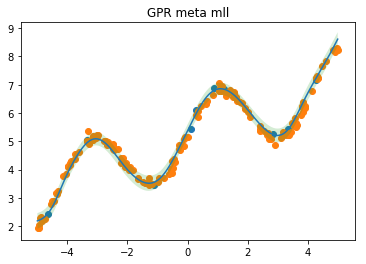

In [34]:
x_plot = np.linspace(-5, 5, num=150)
pred_mean, pred_std = meta_gp.predict(context_x=test_context_x, context_y=test_context_y, test_x=x_plot)
ucb, lcb = meta_gp.confidence_intervals(test_context_x, test_context_y, x_plot, confidence=0.9)

plt.scatter(test_context_x, test_context_y)
plt.scatter(test_target_x, test_target_y)

plt.plot(x_plot, pred_mean)
plt.fill_between(x_plot, lcb, ucb, alpha=0.2)
plt.title('GPR meta mll')
plt.show()

In [36]:
old_state = meta_gp.state_dict()

In [35]:
pred_mean, pred_std = meta_gp.predict(context_x=test_context_x, context_y=test_context_y, test_x=test_target_x)

((pred_mean - test_target_y.flatten())**2).mean()

0.026962659984919903

In [38]:
meta_gp = GPRegressionMetaLearned(meta_train_data=meta_train_data)

In [39]:
pred_mean, pred_std = meta_gp.predict(context_x=test_context_x, context_y=test_context_y, test_x=test_target_x)

((pred_mean - test_target_y.flatten())**2).mean()

0.9778156715044896

In [40]:
meta_gp.load_state_dict(old_state)

In [41]:
pred_mean, pred_std = meta_gp.predict(context_x=test_context_x, context_y=test_context_y, test_x=test_target_x)

((pred_mean - test_target_y.flatten())**2).mean()

0.026962659984919903